## Vancouver House Prices (2004-2024): Exploratory Data Analysis

As a refresher, we're going to analyse Vancouver housing prices from 2004-2024 from Kaggle. The dataset is meant for supervised machine learning, however we'll only focus on the data cleaning & exploratory analysis processes at this stage.

We'll be guided by the following questions:

- Which years and cities had the highest sales volume?
- How have average housing prices in Vancouver changed between 2004 to 2024?
- Have real estate prices been consistent across the city or have a few, select cities experienced high volumes of real estate - activity in their local communities?

In [2]:
#Data analysis libraries 
## import os
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x:.2f}') #Use this to format how decimals display in pandas

import numpy as np

In [3]:
#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (8, 6)

import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [4]:
real_estate_sales_df = pd.read_csv(r"C:\Users\NJ0\OneDrive - Glentel Inc\Desktop\Python Practice\vancouver_synthetic_house_prices_20_years ('04-24).csv")
cities_df = pd.read_csv(r"C:\Users\NJ0\OneDrive - Glentel Inc\Desktop\Python Practice\vancouver_neighborhoods_coordinates.csv")

In [5]:
#View first few rows in each dataset.
print(real_estate_sales_df.head())
print("-------------------------------------------------------------------------------------------")
print("Number of rows & columns in real estate transactions: ") 
print(real_estate_sales_df.shape)
print("-------------------------------------------------------------------------------------------")
print(cities_df.head())
print("-------------------------------------------------------------------------------------------")
print("Number of rows & columns in cities: ") 
print(cities_df.shape)

  Neighborhood  Year  Season Property Type  Bedrooms  Bathrooms  Year Built  \
0    Kitsilano  2004  Spring       Triplex         1          3        1954   
1    Kitsilano  2004  Summer         Condo         3          1        2022   
2    Kitsilano  2004    Fall         House         4          1        2006   
3    Kitsilano  2004  Winter         Condo         2          2        1960   
4    Kitsilano  2005  Spring        Duplex         5          2        1960   

   Renovation Year Garage Type  Square Footage (House)  Square Footage (Land)  \
0          2000.00      Double                    1308                   6742   
1              NaN      Single                    3947                   2592   
2              NaN        None                     919                   9519   
3              NaN      Triple                    2352                   1555   
4          1992.00        None                    2474                   7031   

       Basement  Legal Units  Market P

In [6]:
#From the cities df, take a subset of columns to join to the transactions datatset 
cities_df_subset = cities_df[["City","Neighborhood"]]

#Join/merge datasets together
final_df=pd.merge(cities_df_subset,real_estate_sales_df,left_on="Neighborhood",right_on="Neighborhood")

print(final_df.head())
print("-------------------------------------------------------------------------------------------")
final_df.info()

        City Neighborhood  Year  Season Property Type  Bedrooms  Bathrooms  \
0  Vancouver    Kitsilano  2004  Spring       Triplex         1          3   
1  Vancouver    Kitsilano  2004  Summer         Condo         3          1   
2  Vancouver    Kitsilano  2004    Fall         House         4          1   
3  Vancouver    Kitsilano  2004  Winter         Condo         2          2   
4  Vancouver    Kitsilano  2005  Spring        Duplex         5          2   

   Year Built  Renovation Year Garage Type  Square Footage (House)  \
0        1954          2000.00      Double                    1308   
1        2022              NaN      Single                    3947   
2        2006              NaN        None                     919   
3        1960              NaN      Triple                    2352   
4        1960          1992.00        None                    2474   

   Square Footage (Land)      Basement  Legal Units  Market Price  
0                   6742  Not Finished    

In [7]:
#Generate descriptive statistics on numerical columns
final_df.describe()

,Year,Bedrooms,Bathrooms,Year Built,Renovation Year,Square Footage (House),Square Footage (Land),Legal Units,Market Price
count,3680.00,3680.00,3680.00,3680.00,1565.00,3680.00,3680.00,3680.00,3680.00
mean,2013.50,2.95,1.98,1986.16,2007.35,2747.88,5578.68,0.99,2201569.34
std,5.77,1.42,0.82,21.37,14.16,1292.01,2609.46,0.82,1248105.80
min,2004.00,1.00,1.00,1950.00,1962.00,505.00,1000.00,0.00,311120.27
25%,2008.75,2.00,1.00,1968.00,1998.00,1636.75,3383.00,0.00,1260322.60
50%,2013.50,3.00,2.00,1986.00,2012.00,2736.50,5564.50,1.00,1943198.75
75%,2018.25,4.00,3.00,2004.00,2019.00,3883.25,7856.00,2.00,2860493.50
max,2023.00,5.00,3.00,2023.00,2023.00,4999.00,9997.00,2.00,9461200.59


In [8]:
#Update Market Price data format from decimal number to integer
final_df["Market Price"]=final_df["Market Price"].round(0)

### Change 'Year', 'Year Built' to date data types 

### Data Cleaning

Null values under this column are understandable and can be interpreted to mean that the home being sold has not had a renovation up until the time of sale

In [9]:
#Check for duplicate rows in data 
print("Number of duplicate rows: ")
print(final_df.duplicated().sum())

Number of duplicate rows: 
0


In [10]:
#Filter to rows where Renovation Year is null
null_rows_reno_yr = final_df[final_df['Renovation Year'].isna()]
print("Rows with null values in 'Renovation Year':")
print(null_rows_reno_yr)

Rows with null values in 'Renovation Year':
                City Neighborhood  Year  Season Property Type  Bedrooms  \
1          Vancouver    Kitsilano  2004  Summer         Condo         3   
2          Vancouver    Kitsilano  2004    Fall         House         4   
3          Vancouver    Kitsilano  2004  Winter         Condo         2   
9          Vancouver    Kitsilano  2006  Summer       Triplex         4   
10         Vancouver    Kitsilano  2006    Fall        Duplex         3   
...              ...          ...   ...     ...           ...       ...   
3673  West Vancouver    Caulfeild  2022  Summer         House         3   
3674  West Vancouver    Caulfeild  2022    Fall       Triplex         5   
3677  West Vancouver    Caulfeild  2023  Summer        Duplex         1   
3678  West Vancouver    Caulfeild  2023    Fall        Duplex         1   
3679  West Vancouver    Caulfeild  2023  Winter     Townhouse         1   

      Bathrooms  Year Built  Renovation Year Garage Typ

In [11]:
#Impute NA's under Renovation Year with 0000
final_df["Renovation Year"]=final_df["Renovation Year"].fillna(0000)

#Re-confirm that there are no more null values under 'Renovation Year'
final_df.info()                                                               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 3679
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    3680 non-null   object 
 1   Neighborhood            3680 non-null   object 
 2   Year                    3680 non-null   int64  
 3   Season                  3680 non-null   object 
 4   Property Type           3680 non-null   object 
 5   Bedrooms                3680 non-null   int64  
 6   Bathrooms               3680 non-null   int64  
 7   Year Built              3680 non-null   int64  
 8   Renovation Year         3680 non-null   float64
 9   Garage Type             3680 non-null   object 
 10  Square Footage (House)  3680 non-null   int64  
 11  Square Footage (Land)   3680 non-null   int64  
 12  Basement                3680 non-null   object 
 13  Legal Units             3680 non-null   int64  
 14  Market Price            3680 non-null   

In [12]:
#Change data types using dictionary
new_dtypes = {"Renovation Year":int}

final_df=final_df.astype(new_dtypes)

print("\nUpdated/Final Data Types:")
print(final_df.dtypes)


Updated/Final Data Types:
City                       object
Neighborhood               object
Year                        int64
Season                     object
Property Type              object
Bedrooms                    int64
Bathrooms                   int64
Year Built                  int64
Renovation Year             int32
Garage Type                object
Square Footage (House)      int64
Square Footage (Land)       int64
Basement                   object
Legal Units                 int64
Market Price              float64
dtype: object


In [13]:
final_df.describe()

,Year,Bedrooms,Bathrooms,Year Built,Renovation Year,Square Footage (House),Square Footage (Land),Legal Units,Market Price
count,3680.00,3680.00,3680.00,3680.00,3680.00,3680.00,3680.00,3680.00,3680.00
mean,2013.50,2.95,1.98,1986.16,853.67,2747.88,5578.68,0.99,2201569.34
std,5.77,1.42,0.82,21.37,992.58,1292.01,2609.46,0.82,1248105.81
min,2004.00,1.00,1.00,1950.00,0.00,505.00,1000.00,0.00,311120.00
25%,2008.75,2.00,1.00,1968.00,0.00,1636.75,3383.00,0.00,1260322.75
50%,2013.50,3.00,2.00,1986.00,0.00,2736.50,5564.50,1.00,1943198.50
75%,2018.25,4.00,3.00,2004.00,2008.00,3883.25,7856.00,2.00,2860493.50
max,2023.00,5.00,3.00,2023.00,2023.00,4999.00,9997.00,2.00,9461201.00


### Data Exploration

Which years had the highest sales? Which cities and neighbourhoods were most popular during this period?

In [14]:
print("Top 5 Year by Sales Volume: ")
sales_units_year = final_df.groupby("Year")["Legal Units"].sum().reset_index()
sales_units_year = sales_units_year.sort_values('Legal Units', ascending=False)
print(sales_units_year.head())
print("-------------------------------------------------------------------------------------------")
print("Top 5 Year by Sales Price: ")
sales_price_year = final_df.groupby("Year")["Market Price"].sum().reset_index()
sales_price_year = sales_price_year.sort_values('Market Price', ascending=False)
print(sales_price_year.head())

Top 5 Year by Sales Volume: 
    Year  Legal Units
3   2007          208
7   2011          204
15  2019          203
11  2015          199
9   2013          198
-------------------------------------------------------------------------------------------
Top 5 Year by Sales Price: 
    Year  Market Price
17  2021  619909061.00
18  2022  585799955.00
19  2023  571164374.00
16  2020  523611840.00
15  2019  490896594.00


In [15]:
print("Top 5 City by Sales Price: ")
sales_price_city = final_df.groupby("City")["Market Price"].sum().reset_index()
sales_price_city = sales_price_city.sort_values('Market Price', ascending=False)
print(sales_price_city.head())
print("-------------------------------------------------------------------------------------------")
print("Top 5 Neighborhood by Sales Price: ")
sales_price_nbd = final_df.groupby(["Neighborhood","City"])["Market Price"].sum().reset_index()
sales_price_nbd = sales_price_nbd.sort_values('Market Price', ascending=False)
print(sales_price_nbd.head())

Top 5 City by Sales Price: 
              City  Market Price
8        Vancouver 1057056484.00
7           Surrey  898668261.00
0          Burnaby  885636215.00
3  New Westminster  884467032.00
6         Richmond  879901316.00
-------------------------------------------------------------------------------------------
Top 5 Neighborhood by Sales Price: 
   Neighborhood             City  Market Price
14     Downtown  New Westminster  339836997.00
15     Downtown        Vancouver  339836997.00
27  Lynn Valley  North Vancouver  200507614.00
18      Edmonds          Burnaby  196333107.00
29    Mary Hill   Port Coquitlam  193522723.00


### Data Visualization

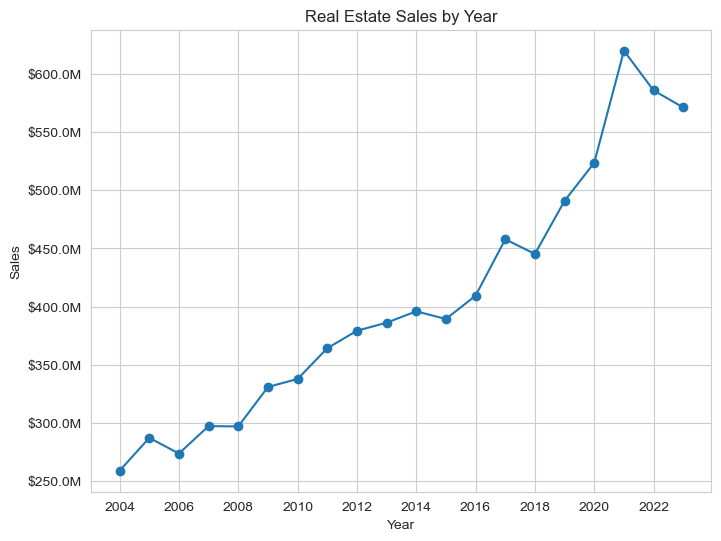

In [16]:
#Visualize to see if their are certain seasons that are more popular than others. seasonal sales trades using Line Chart 

Year_Price_df = final_df[["Year","Market Price"]]
Year_Price_df = final_df.groupby("Year")["Market Price"].sum().reset_index()

Year_Price_df["Year"]=pd.to_datetime(Year_Price_df["Year"], format="%Y") ## Change Year to date data type for visualization


x_values = Year_Price_df[["Year"]]
y_values = Year_Price_df[["Market Price"]]

plt.plot (x_values, y_values, marker='o')

plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Real Estate Sales by Year")

fmt = mtick.FuncFormatter(lambda x, _:  f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(fmt)

plt.show()

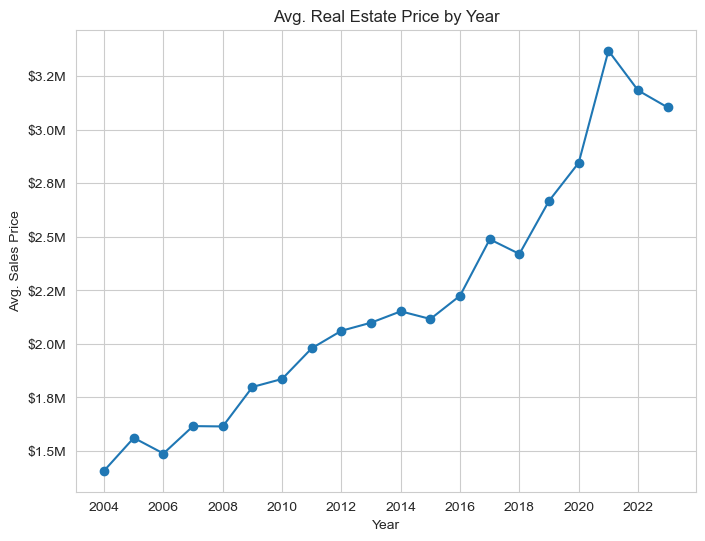

In [17]:
#Visualize average home selling prices 

Year_Price_df = final_df[["Year","Market Price"]]
Year_Price_df = final_df.groupby("Year")["Market Price"].mean().reset_index()

Year_Price_df["Year"]=pd.to_datetime(Year_Price_df["Year"], format="%Y") #Change Year to date data type for visualization


x_values = Year_Price_df[["Year"]]
y_values = Year_Price_df[["Market Price"]]

plt.plot (x_values, y_values, marker='o')

plt.xlabel("Year")
plt.ylabel("Avg. Sales Price")
plt.title("Avg. Real Estate Price by Year")

fmt = mtick.FuncFormatter(lambda x, _:  f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(fmt)

plt.show()

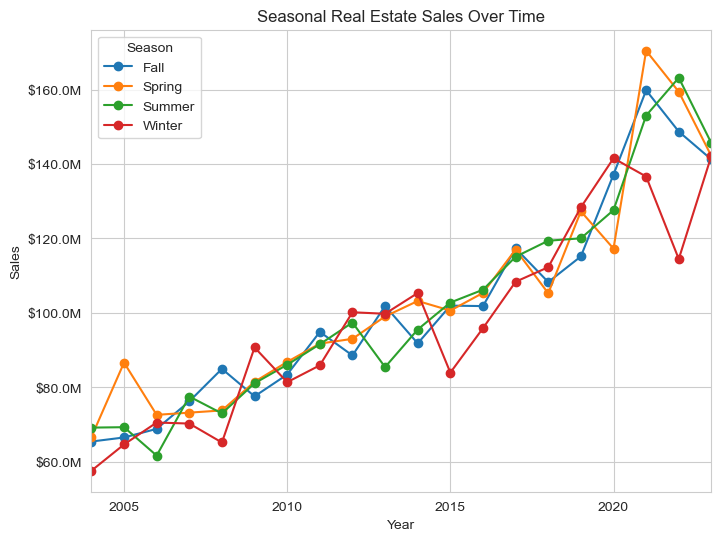

In [18]:
#Visualize to see if there's seasonality

Year_Price_df = final_df[["Year","Market Price","Season"]]
Year_Price_df = final_df.groupby(["Year", "Season"])["Market Price"].sum().reset_index()

Year_Price_df["Year"]=pd.to_datetime(Year_Price_df["Year"], format="%Y")
pivot_df = Year_Price_df.pivot(
    index="Year",
    columns="Season",
    values="Market Price"
)

pivot_df.plot (marker='o')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Seasonal Real Estate Sales Over Time")

fmt = mtick.FuncFormatter(lambda x, _:  f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(fmt)

plt.show()

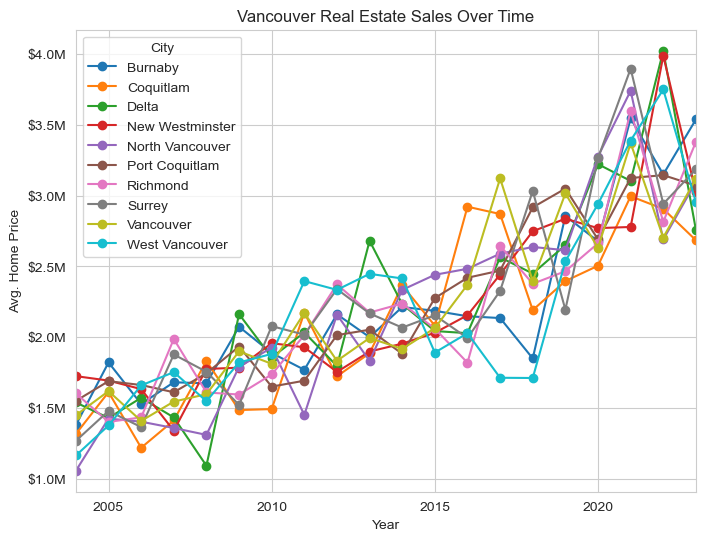

In [22]:
#Visualize to see if their are certain cities that are more popular than others

Year_Price_df = final_df[["Year","Market Price","City"]]
Year_Price_df = final_df.groupby(["Year", "City"])["Market Price"].mean().reset_index()

Year_Price_df["Year"]=pd.to_datetime(Year_Price_df["Year"], format="%Y")

pivot_df = Year_Price_df.pivot(
    index="Year",
    columns="City",
    values="Market Price"
)

pivot_df.plot (marker='o')
plt.xlabel("Year")
plt.ylabel("Avg. Home Price")
plt.title("Vancouver Real Estate Sales Over Time")

fmt = mtick.FuncFormatter(lambda x, _:  f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(fmt)

plt.show()

### Key Insights

- Real estate sales and average sale prices more than doubled between 2004 and 2024, with the most pronounced peaks occurring during the COVID-19 pandemic period between 2020-2022.   
- The City of Vancouver recorded the highest total sales over the 20-year period. Overall, the top-performing cities were all located within the Lower Mainland/Greater Vancouver region.
- Downtown Vancouver and Downtown New Westminster were among the top neighbourhoods by sales dollars, suggesting demanf for dense, central, and urban areas. This may possibly reflect interest from younger, more urban-oriented buyers. 
- COVID-19 years (2020-2022) saw unusually high real estate activity, likely influenced by the significantly lower interest rates during that period.  
- All seasons showed long-term growth however, Spring & Summer consistently showed the highest sales peaks, suggesting they are the most active periods for real estate.